In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

!pip install joypy
from joypy import joyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
data_dir = '/content/drive/MyDrive/Linguistic abstraction summer 2023/Datasets/'

In [3]:
div_keybert = pd.read_csv(data_dir+'Diversity study abstraction results/hetero_homo_KeyBERT_sim.csv', index_col=0)
div_bart = pd.read_csv(data_dir+'Diversity study abstraction results/hetero_homo_bart_sim.csv', index_col=0)

pilot_keybert = pd.read_csv(data_dir+'Pilot study abstraction results/pilot_KeyBERT_sim 01.24.23.csv', index_col=0)
pilot_bart = pd.read_csv(data_dir+'Pilot study abstraction results/pilot_bart_sim2sum 01.02.23.csv', index_col=0)

In [ ]:
div_keybert.head()

,ID,hetero_text,homo_text,hetero_KeyBERT_5_Pre,homo_KeyBERT_5_Pre,hetero_KeyBERT_5_keywords,homo_KeyBERT_keywords,hetero_sim1_KeyBERT_5,homo_sim1_KeyBERT_5,hetero_sim2_KeyBERT_5,homo_sim2_KeyBERT_5
0,1,We all have the same seminar class. Taylor is ...,We all grab lunch and coffee to discuss over c...,seminar class taylor freshman majority junior ...,grab lunch coffee discus class assignment deci...,topic seminar assignment class freshman,lunch presentation class talk assignment,0.595242,0.621447,0.591137,0.631789
1,2,I imagine us in a group at some sort of social...,I imagine us sitting in Washington square park...,imagine u group sort social party would end gr...,imagine u sitting washington square park bench...,social conversation friend spread group,walking class talking sitting park,0.625332,0.547104,0.590350,0.448743
2,3,I picture them dispersed around the room where...,I would imagine those who have known each othe...,picture dispersed around room social gathering...,would imagine known longest would closest amon...,mingle social gathering room conversation,semester conversation meet group plan,0.539874,0.630474,0.547698,0.608151
3,4,We go around in a circle explaining who we are...,I'm confused. I don't know why I am here. I th...,go around circle explaining majoring feel plai...,confused know think fuck walk group student au...,frisbee game touchdown leap circle,think sensation confused body blurts,0.588942,0.445564,0.430222,0.308893
4,5,"Amani P., Alex V., Max M., Sam V., Jordan T., ...",It was the night of the Broadway show and bein...,amani alex max sam jordan taylor decide go din...,night broadway show drama student jessie jude ...,dinner celebrating dessert eating week,broadway drama conversation outsider whisper,0.422206,0.419174,0.520343,0.551441


In [ ]:
div_bart.head()

,ID,hetero_text,homo_text,hetero_BART_5_30,homo_BART_5_30,hetero_sim1_BART_5_30,homo_sim1_BART_5_30,hetero_sim2_BART_5_30,homo_sim2_BART_5_30
0,1,We all have the same seminar class. Taylor is ...,We all grab lunch and coffee to discuss over c...,Taylor is the only freshman in the seminar cla...,"After lunch and coffee, we discuss over the cl...",0.803772,0.811154,0.848698,0.797071
1,2,I imagine us in a group at some sort of social...,I imagine us sitting in Washington square park...,I imagine us in a group at some sort of social...,I imagine us sitting in Washington square park...,0.945102,0.852560,0.878405,0.754966
2,3,I picture them dispersed around the room where...,I would imagine those who have known each othe...,Amani P. and Taylor N. make their way over to ...,They have the same majors as me. They are at l...,0.639953,0.599800,0.583239,0.512796
3,4,We go around in a circle explaining who we are...,I'm confused. I don't know why I am here. I th...,"They explain who they are, where they are from...",Nervousness fills her body as she walks up to ...,0.408163,0.562174,0.507997,0.508747
4,5,"Amani P., Alex V., Max M., Sam V., Jordan T., ...",It was the night of the Broadway show and bein...,"Amani P., Alex V., Max M., Sam V., Jordan T., ...","Jessie A., Jude L., Dion L., Ariel C., Lian C....",0.647097,0.585169,0.653579,0.580499


In [4]:
div_bart_sim1 = pd.concat([div_bart[c] for c in div_bart.iloc[:,5:7].columns], ignore_index=True)
div_bart_sim2 = pd.concat([div_bart[c] for c in div_bart.iloc[:,7:].columns], ignore_index=True)
div_keybert_sim1 = pd.concat([div_keybert[c] for c in div_keybert.iloc[:,7:9].columns], ignore_index=True)
div_keybert_sim2 = pd.concat([div_keybert[c] for c in div_keybert.iloc[:,9:].columns], ignore_index=True)
div_scores = pd.concat([div_bart_sim1, div_bart_sim2, div_keybert_sim1, div_keybert_sim2], axis=1)\
                    .rename(columns={0:'bart_sim1', 1:'bart_sim2', 2:'keybert_sim1', 3:'keybert_sim2'})
div_scores

,bart_sim1,bart_sim2,keybert_sim1,keybert_sim2
0,0.803772,0.848698,0.595242,0.591137
1,0.945102,0.878405,0.625332,0.590350
2,0.639953,0.583239,0.539874,0.547698
3,0.408163,0.507997,0.588942,0.430222
4,0.647097,0.653579,0.422206,0.520343
...,...,...,...,...
657,0.644138,0.426776,0.477030,0.470354
658,0.626289,0.618985,0.497420,0.583075
659,0.896352,0.872694,0.591105,0.672866
660,0.612154,0.631386,0.673660,0.565193


In [7]:
pilot_keybert.head()

,ID,ES_ellab,ES_KeyBERT,EP_ellab,EP_KeyBERT,AS_ellab,AS_KeyBERT,AP_ellab,AP_KeyBERT,ES_sim1,EP_sim1,AS_sim1,AP_sim1,ES_sim2,EP_sim2,AS_sim2,AP_sim2
0,1,imagine friend imagine going get food also wal...,friend imagine commuting walking class,visited class dorm spoke worked assignment dec...,lecture class spoke dorm assignment,ate break class went local pizza shop get quic...,class went ate walked break,talked waited professor start lecture made pla...,lecture professor talked plan weekend,0.779847,0.617693,0.731574,0.837123,0.804422,0.719223,0.732404,0.829733
1,2,eating eating pancake dinner table sun bright ...,brunch pancake dinner eating table,walking middle,walking middle,standing front door,standing door,standing front,standing,0.908235,1.000000,0.929547,0.769752,0.810381,1.000000,0.895331,0.778133
2,3,picture journey house sunny day new york pictu...,picture backyard house journey apartment,walking sunny street iced coffee talking weeke...,shopping shop walking coffee weekend,imagine similar scene sunny day three u backya...,hammock backyard spectator talking zone,outdoor patio outside pizza parlor see three g...,pizza patio eating outdoor outside,0.674704,0.816366,0.773476,0.665875,0.615044,0.774289,0.712579,0.716137
3,4,talk exam told got last multiple choice wrong ...,exam talk help monday ask,dinner enjoying seafood restaurant lobster rea...,dinner seafood restaurant cocktail lobster,good friend lunch together talking recent vide...,friend game play invite lunch,might friend dinner together afterwards chat r...,chat dinner friend house tv,0.648629,0.916717,0.763155,0.811841,0.665780,0.877916,0.763790,0.668832
4,5,ate pizza salad talked breakup got lunch,lunch salad breakup pizza ate,went home visit offered food already ate lunch...,lunch ate food visit asked,breaking want tell love anymore idea feeling w...,breaking love talking feeling tell,best friend walked school home grab late lunch...,gossiping friend school lunch happy,0.845037,0.859991,0.834725,0.822950,0.884272,0.786713,0.805779,0.837482


In [8]:
pilot_bart.head()

,ID,ES_ellab,ES_bart,EP_ellab,EP_bart,AS_ellab,AS_bart,AP_ellab,AP_bart,ES_sim1,EP_sim1,AS_sim1,AP_sim1,ES_sim2,EP_sim2,AS_sim2,AP_sim2
0,1,"I imagine, that I was friend with Ariel. I ima...",I imagine Ariel and I were going to get food t...,I visited Sam and Jessie between classes at th...,I visited Sam and Jessie between classes at th...,Taylor ate with Ariel during their break betwe...,Taylor ate with Ariel during their break betwe...,Taylor talked with Sam and Jessie as they wait...,Taylor talked with Sam and Jessie as they wait...,0.849753,0.936639,0.942629,0.936430,0.812113,0.946899,0.944497,0.946942
1,2,I am eating with Sam. We are eating pancake at...,Sam and I are eating pancakes at the dinner ta...,I am walking with Ariel and Taylor. I am in th...,Ariel and Taylor are walking with Taylor.,Jessie standing in front of Sam's door.,Jessie is standing in front of Sam's door.,Jessie is standing in front of Ariel and Taylor.,Jessie is standing in front of Ariel and Taylor.,0.825273,0.718173,0.994862,1.000000,0.760576,0.816259,0.979708,1.000000
2,3,I picture the journey to Sam's house on a sunn...,Sam and I will hang out in the backyard of Sam...,We are walking down a sunny street with iced c...,They are walking down a sunny street with iced...,"I imagine a similar scene, it being a sunny da...",Sam and Taylor are hanging out in Sam's backya...,On an outdoor patio outside a pizza parlor I s...,Taylor saw three girls eating pizza outside a ...,0.623579,0.846943,0.729449,0.876967,0.630557,0.755508,0.601333,0.767936
3,4,I talk about the exam. Sam told me that I got ...,Sam told him that he got the last multiple cho...,I am having dinner with Jessie and Taylor. We ...,Jessie and Taylor are having dinner with Jessi...,Ariel and Sam are good friends. They just had ...,Ariel and Sam had lunch together and are talki...,Ariel might be a friend of Jessie and Taylor. ...,Ariel might be a friend of Jessie and Taylor. ...,0.833487,0.840479,0.920008,0.952911,0.898706,0.825237,0.913149,0.964960
4,5,I ate pizza with Sam. Sam had a salad. We talk...,I ate pizza with Sam and we talked about his b...,I went to Ariel's home to visit Jessie and Tay...,Jessie and Taylor asked me about Sam. Sam and ...,Ariel is breaking up with Sam. She wants to te...,Ariel wants to break up with Sam because she d...,"Ariel, Jessie, and Taylor are best friends. Th...","Ariel, Jessie, and Taylor are best friends. Th...",0.895668,0.880819,0.892195,0.941636,0.930484,0.875364,0.935766,0.932115


In [7]:
pilot_bart_sim1 = pd.concat([pilot_bart[c] for c in pilot_bart.iloc[:,9:13].columns], ignore_index=True)
pilot_bart_sim2 = pd.concat([pilot_bart[c] for c in pilot_bart.iloc[:,13:].columns], ignore_index=True)
pilot_keybert_sim1 = pd.concat([pilot_keybert[c] for c in pilot_keybert.iloc[:,9:13].columns], ignore_index=True)
pilot_keybert_sim2 = pd.concat([pilot_keybert[c] for c in pilot_keybert.iloc[:,13:].columns], ignore_index=True)
pilot_scores = pd.concat([pilot_bart_sim1, pilot_bart_sim2, pilot_keybert_sim1, pilot_keybert_sim2], axis=1)\
                    .rename(columns={0:'bart_sim1', 1:'bart_sim2', 2:'keybert_sim1', 3:'keybert_sim2'})
pilot_scores

,bart_sim1,bart_sim2,keybert_sim1,keybert_sim2
0,0.849753,0.812113,0.779847,0.804422
1,0.825273,0.760576,0.908235,0.810381
2,0.623579,0.630557,0.674704,0.615044
3,0.833487,0.898706,0.648629,0.665780
4,0.895668,0.930484,0.845037,0.884272
...,...,...,...,...
767,0.779964,0.762079,0.699766,0.669805
768,0.726085,0.687627,0.607911,0.638813
769,0.960578,0.978332,0.682089,0.751534
770,0.932691,0.916898,0.909833,0.859480


In [8]:
combined_scores = pd.concat([div_scores, pilot_scores], ignore_index=True)

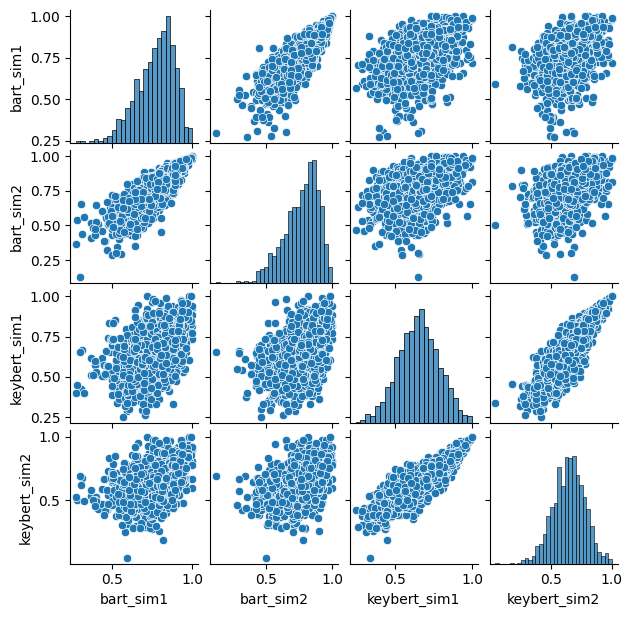

In [19]:
g = sns.pairplot(combined_scores)
g.fig.set_size_inches(6,6)

<Axes: >

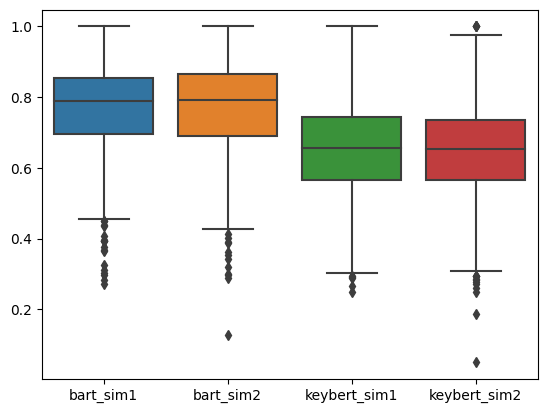

In [13]:
sns.boxplot(data=combined_scores)

<Axes: >

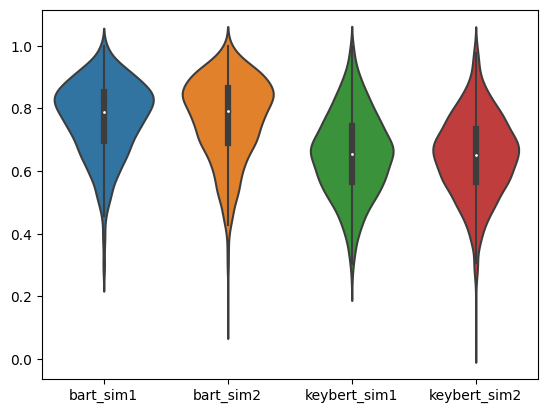

In [9]:
sns.violinplot(combined_scores)

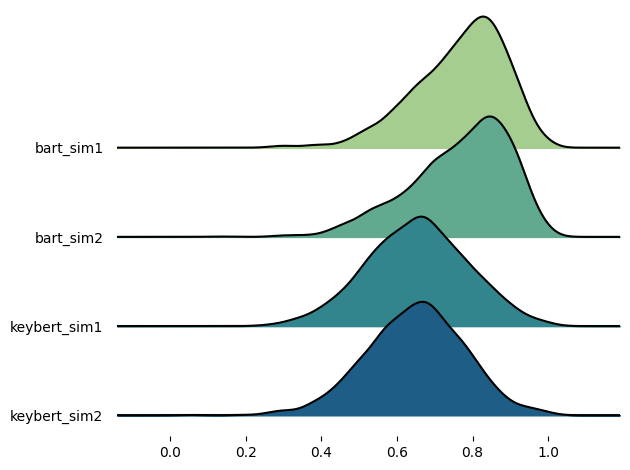

In [15]:
joyplot(combined_scores, colormap=sns.color_palette("crest", as_cmap=True));

### Correlation Matrix

In [7]:
combined_scores.corr()

,bart_sim1,bart_sim2,keybert_sim1,keybert_sim2
bart_sim1,1.000000,0.842463,0.480268,0.450515
bart_sim2,0.842463,1.000000,0.472622,0.477907
keybert_sim1,0.480268,0.472622,1.000000,0.847798
keybert_sim2,0.450515,0.477907,0.847798,1.000000


<Axes: >

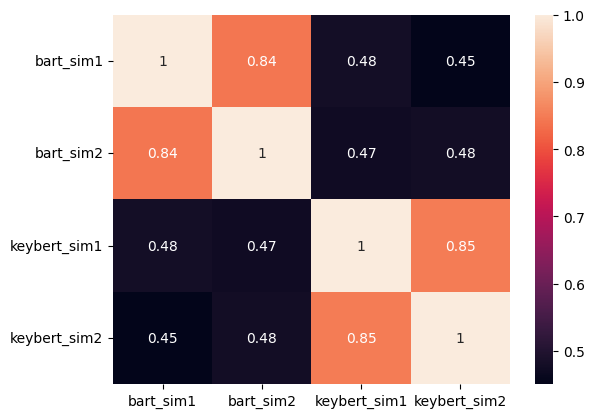

In [8]:
corr = combined_scores.corr()

# plot the heatmap
sns.heatmap(corr, annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [9]:
from scipy.stats._result_classes import PearsonRResult
import scipy.stats as stats

def pearson_ci(x,y,alpha=0.05):
    res = stats.pearsonr(x,y, alternative='two-sided')
    ci = res.confidence_interval()
    return ci.low, ci.high

In [49]:
for i in range(len(combined_scores.columns)):
  for j in range(i+1, len(combined_scores.columns)):
    x,y = combined_scores.iloc[:,i], combined_scores.iloc[:,j]
    l,h = pearson_ci(x,y,alpha=0.05)
    print(l,h)

0.8267523636411162 0.8568601355376184
0.43942765754357355 0.519127603756652
0.4082713976902662 0.49083411755763506
0.43141160574654014 0.511864753267331
0.43695088430921536 0.5168847802631789
0.8325715717100369 0.8617445929281714


### KMeans

In [ ]:
n = div_bart.shape[0]
labels = np.zeros(n*2)
labels[:n] = 1

In [ ]:
X = np.vstack([div_bart.iloc[:, 5:], div_keybert.iloc[:,7:]])
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
kmeans

KMeans(n_clusters=2, n_init='auto', random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[0.56217383, 0.56266746, 0.56054361, 0.55495855],
       [0.75177212, 0.72666729, 0.75862241, 0.71290155]])

In [ ]:
centroid_2d = pca.fit_transform(kmeans.cluster_centers_)

In [ ]:
centroid_2d

array([[ 1.78202593e-01,  6.24500451e-17],
       [-1.78202593e-01,  6.24500451e-17]])

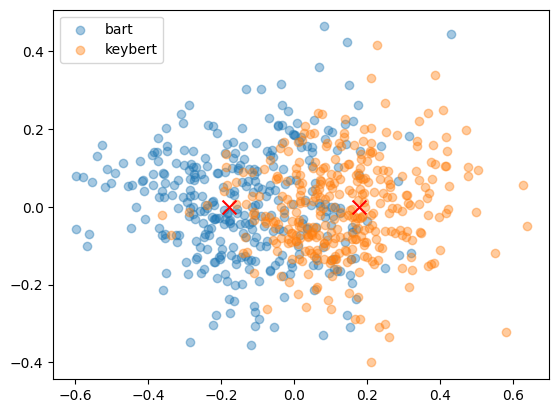

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)
plt.scatter(pca_2d[:,0][:n], pca_2d[:,1][:n],label='bart',alpha=0.4)
plt.scatter(pca_2d[:,0][n:], pca_2d[:,1][n:],label='keybert',alpha=0.4)
plt.scatter(centroid_2d[0][0], centroid_2d[0][1],c='r',marker='x',s=100)
plt.scatter(centroid_2d[1][0], centroid_2d[1][1],c='r',marker='x', s=100)
plt.legend()